<a href="https://colab.research.google.com/github/Johnvasc/CLASSIFICA-O-UNI-E-MULTIRR-TULO-DE-SENTIMENTOS-EM-TEXTOS-CURTOS/blob/main/Codigos/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import spacy

In [ ]:
dataset = pd.read_excel('drive/MyDrive/Datasets/ComentáriosB.xlsx')
dataset_sintetico = pd.read_excel('drive/MyDrive/Datasets/Dados sintéticosB.xlsx')

In [ ]:
dataset_sintetico = dataset_sintetico[dataset_sintetico['Emoção 1'] != 'neutro']
dataset = dataset[dataset['Emoção 1'] != 'neutro']

## Tratamento de dados

In [ ]:
words_to_remove = set([
    'a', 'o', 'e', 'de', 'que', 'em', 'para', 'com', 'não', 'uma', 'os', 'as', 'é', 'por', 'se', 'na', 'no', 'dos', 'das',
    'do', 'da', 'eu', 'ele', 'ela', 'eles', 'elas', 'você', 'vocês', 'me', 'te', 'nos', 'eh', 'um', 'ah', 'q', 'isso',
    'aquele', 'aquela', 'assim', 'então', 'muito', 'mais', 'menos', 'sempre', 'nunca', 'talvez', 'algum', 'alguma',
    'todo', 'toda', 'todos', 'todas', 'outro', 'outra', 'outros', 'outras', 'qual', 'quais', 'quem', 'como', 'onde',
    'quando', 'porque', 'mesmo', 'mesma', 'mesmos', 'mesmas', 'só', 'também', 'ainda', 'já', 'agora', 'apenas', 'nem',
    'senão', 'ora', 'aliás', 'enfim', 'contudo', 'todavia', 'portanto', 'logo', 'pois', 'entretanto', 'ademais',
    'outrossim', 'conquanto', 'doravante', 'mormente', 'demais', 'além', 'apesar', 'que', 'essa', 'esse', 'mas', 'tem',
    'pra', 'meu', 'todo', 'ra', 'minha', 'tudo', 'foi', 'ser', 'tá', 'tô', 'cara', 'deu', 'vai', 'vídeo', 'vc', 'deu', 'coisa'
])

# words_to_remove = set([
#     'que', 'de', 'e', 'é', 'o',  'eu', 'um', 'ser', 'em'
# ])

def remove_words_from_dataset(dataset, words_to_remove):
    if 'Comentário' not in dataset.columns:
        raise KeyError("A coluna 'Comentário' não foi encontrada no dataset")

    dataset['Comentário'] = dataset['Comentário'].astype(str).apply(
        lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in words_to_remove])
    )
    return dataset

# Aplicando a função
dataset = remove_words_from_dataset(dataset, words_to_remove)
dataset_sintetico = remove_words_from_dataset(dataset_sintetico, words_to_remove)


In [ ]:

emoji_substitutions = {
    ":)": " felicidade",
    ":(": " tristeza ",
    ":D": " felicidade",
    ":P": " felicidade",
    ":|": " tristeza ",
    ":O": "surpresa ",
    ";)": " felicidade",
    ":/": " tristeza ",
    ":O": "surpresa ",
    ":*": " felicidade ",
    "XD": " felicidade ",
    ":'(": " tristeza ",
    "🤢": " nojo ",
    "😢": " tristeza ",
    "😍": " felicidade ",
    "😊": " felicidade ",
    "👏🏼": " felicidade ",
    "😃": " felicidade ",
    "🤣": " felicidade ",
    "😂": " felicidade ",
    "😌": " felicidade ",
    "🤭": " felicidade ",
    "👏": " felicidade ",
    "☺️": " felicidade ",
    "👍": " felicidade ",
    "😉": " felicidade ",
    "😅": " felicidade ",
    "😇": " felicidade ",
    "🙂": " felicidade ",
    "😝": " felicidade ",
    "😎": " felicidade ",
    "😁": " felicidade ",
    "😌": " felicidade ",
    "😛": " felicidade ",
    "😮": " surpresa ",
    "😯": " surpresa ",
    "😒": " tristeza ",
    "😓": " tristeza ",
    "😔": " tristeza ",
    "😖": " tristeza ",
    "😤": " raiva ",
    "🥰": " felicidade ",
    "❤️": " felicidade ",
    "🤩": " felicidade ",
    "😭": " tristeza ",
    "😃": " felicidade ",
    "😌": " felicidade ",
    "😒": " tristeza ",
    "😓": " tristeza ",
    "😔": " tristeza ",
    "😖": " tristeza ",
    "😤": " raiva ",
    "😢": " tristeza ",
    "😭": " tristeza ",
    "😞": " tristeza ",
    "😠": " raiva ",
    "😡": " raiva ",
    "🤬": " raiva ",
    "😤": " raiva ",
    "😨": " medo ",
    "😰": " medo ",
    "😨": " medo ",
    "😱": " medo ",
    "🤮": " nojo ",
    "🤢": " nojo ",
    "🙄": " raiva",
    "🥳": " felicidade ",
    "🥺": " tristeza ",
    "😩": " tristeza ",
    "😫": " tristeza ",
    "😥": " tristeza ",
    "😲": " surpresa ",
    "😄": " felicidade ",
    "🤦‍♂️": " raiva "

}

def replace_emojis(text):
    for emoji, word in emoji_substitutions.items():
        text = text.replace(emoji, word)
    return text


dataset['Comentário'] = dataset['Comentário'].apply(replace_emojis)
dataset_sintetico['Comentário'] = dataset_sintetico['Comentário'].apply(replace_emojis)

In [ ]:
import re

sins_substitutions = {
    # Felicidade
    "alegre": "felicidade",
    "contente": "felicidade",
    "animado": "felicidade",
    "feliz": "felicidade",
    "felizinho": "felicidade",
    "felizinha": "felicidade",
    "divertido": "felicidade",
    "radiante": "felicidade",
    "eufórico": "felicidade",
    "empolgado": "felicidade",
    "sorridente": "felicidade",
    "satisfeito": "felicidade",
    "realizado": "felicidade",
    "exultante": "felicidade",
    "extasiado": "felicidade",
    "maravilhado": "felicidade",
    "grato": "felicidade",
    "agradecido": "felicidade",

    # Tristeza
    "infeliz": "tristeza",
    "triste": "tristeza",
    "melancólico": "tristeza",
    "bad": "tristeza",
    "sad": "tristeza",
    "depre": "tristeza",
    "depresivo": "tristeza",
    "depress": "tristeza",
    "desanimado": "tristeza",
    "abatido": "tristeza",
    "choroso": "tristeza",
    "magoado": "tristeza",
    "desesperado": "tristeza",
    "aflito": "tristeza",
    "amargurado": "tristeza",
    "solitário": "tristeza",
    "angustiado": "tristeza",
    "desolado": "tristeza",
    "tristezaza": "tristeza",

    # Raiva
    "furioso": "raiva",
    "estressado": "raiva",
    "ódio": "raiva",
    "vtmnc": "raiva",
    "fdp": "raiva",
    "vsf": "raiva",
    "vtnc": "raiva",
    "pistola": "raiva",
    "irritado": "raiva",
    "bravo": "raiva",
    "enfurecido": "raiva",
    "inconformado": "raiva",
    "ressentido": "raiva",
    "frustrado": "raiva",
    "furibundo": "raiva",
    "exasperado": "raiva",
    "rancoroso": "raiva",
    "indignado": "raiva",
    "pqp": "raiva",

    # Medo
    "assustado": "medo",
    "apavorado": "medo",
    "aterrorizado": "medo",
    "nervoso": "medo",
    "receoso": "medo",
    "amedrontado": "medo",
    "temeroso": "medo",
    "ansioso": "medo",
    "tenso": "medo",
    "preocupado": "medo",
    "inseguro": "medo",

    # Nojo
    "nojento": "nojo",
    "enojado": "nojo",
    "repulsivo": "nojo",
    "desgostoso": "nojo",
    " asco ": "nojo",
    "revoltado": "nojo",
    "indignado": "nojo",

    # Surpresa
    "surpreso": "surpresa",
    "chocado": "surpresa",
    "perplexo": "surpresa",
    "atônito": "surpresa",
    "boquiaberto": "surpresa",
    "espantado": "surpresa",

}

def replace_sin(text):
    for sins, word in sins_substitutions.items():
        # Substitui a palavra por "palavra_original palavra_substituta"
        text = re.sub(rf'\b{re.escape(sins)}\b', rf'{sins} {word}', text)
    return text


dataset['Comentário'] = dataset['Comentário'].apply(replace_sin)
dataset_sintetico['Comentário'] = dataset_sintetico['Comentário'].apply(replace_sin)


In [ ]:

import re

def replace_laughter_with_felicidade(text):
    """Substitui kkkkkkkk, hahahaha, rsrsrs e suas variações por 'felicidade'."""

    patterns = [
        r'\b[kK]{2,}\b',        # kkk, KKKK, etc (mínimo de 2 'k')
        r'\b[hH][aA]{1,}\b',    # ha, haha, HAHAHA, etc (mínimo de 1 'a' após 'h')
        r'\b[rR][sS]{1,}\b',    # rs, rsrs, RSRSRS, etc (mínimo de 1 's' após 'r')
        r'\b[kK][aA]{1,}\b'     # ka, kaka, KAKA, etc (mínimo de 1 'a' após 'k')
    ]

    for pattern in patterns:
        text = re.sub(pattern, 'felicidade', text)

    text = re.sub(r'\s+', ' ', text).strip()

    return text


## RNA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer # Importação para multirrótulo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np


combined_dataset = pd.concat([dataset], ignore_index=True)


X = combined_dataset['Comentário'].fillna('')


emotion_cols = [col for col in combined_dataset.columns if 'Emoção' in col]


y_raw = combined_dataset[emotion_cols].apply(
    lambda row: [emotion for emotion in row.dropna().tolist()], axis=1
)


mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y_raw)



print(f"Total de amostras: {len(X)}")
print(f"Formato de X (comentários): {X.shape}")
print(f"Formato de y (rótulos binarizados): {y.shape}")
print(f"Classes (emoções) encontradas: {mlb.classes_}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"\nFormato de X_train_vec após TF-IDF: {X_train_vec.shape}")
print(f"Formato de y_train após binarização: {y_train.shape}")


model = Sequential([
    Dense(128, activation='gelu', input_shape=(X_train_vec.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='gelu'),
    Dropout(0.3),

    Dense(len(mlb.classes_), activation='sigmoid')
])

model.compile(
    optimizer='adam',

    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n--- Treinamento do Modelo ---")
history = model.fit(X_train_vec, y_train, epochs=15, verbose=1, validation_split=0.1)

print("\n--- Avaliação do Modelo ---")
loss, acc = model.evaluate(X_test_vec, y_test, verbose=0)
print(f"Loss no conjunto de teste: {loss:.4f}")
print(f"Acurácia no conjunto de teste: {acc*100:.2f}%")


print("\n--- Exemplo de Predição ---")
predictions = model.predict(X_test_vec)


threshold = 0.5
predicted_labels_binary = (predictions > threshold).astype(int)


predicted_emotions = mlb.inverse_transform(predicted_labels_binary)


num_examples_to_show = 5
print(f"\nPrimeiras {num_examples_to_show} previsões no conjunto de teste:")
for i in range(num_examples_to_show):
    print(f"Comentário: {X_test.iloc[i][:50]}...")
    print(f"Rótulos Reais: {mlb.inverse_transform(y_test[i].reshape(1, -1))[0]}")
    print(f"Rótulos Preditos: {predicted_emotions[i]}\n")

Total de amostras: 2027
Formato de X (comentários): (2027,)
Formato de y (rótulos binarizados): (2027, 7)
Classes (emoções) encontradas: ['felicidade' 'medo' 'neutro' 'nojo' 'raiva' 'surpresa' 'tristeza']

Formato de X_train_vec após TF-IDF: (1418, 4140)
Formato de y_train após binarização: (1418, 7)

--- Treinamento do Modelo ---
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2811 - loss: 0.6698 - val_accuracy: 0.2958 - val_loss: 0.5205
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3597 - loss: 0.4577 - val_accuracy: 0.4648 - val_loss: 0.3758
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3881 - loss: 0.3777 - val_accuracy: 0.3662 - val_loss: 0.3668
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4123 - loss: 0.3517 - val_accuracy: 0.4014 - val_loss: 0.3579
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4881 - loss: 0.3391 - val_accuracy: 0.4859 - val_loss: 0.3446
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5870 - loss: 0.3024 - val_accuracy: 0.5000 - val_loss: 0.3273
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6782 - loss: 0.2558 - val_accuracy: 0.5070 - val_loss: 0.3071
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7354 - loss: 0.2116 - val_accuracy: 0.5211 - val_loss: 0.

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
--- Matrizes de Confusão para Cada Emoção ---


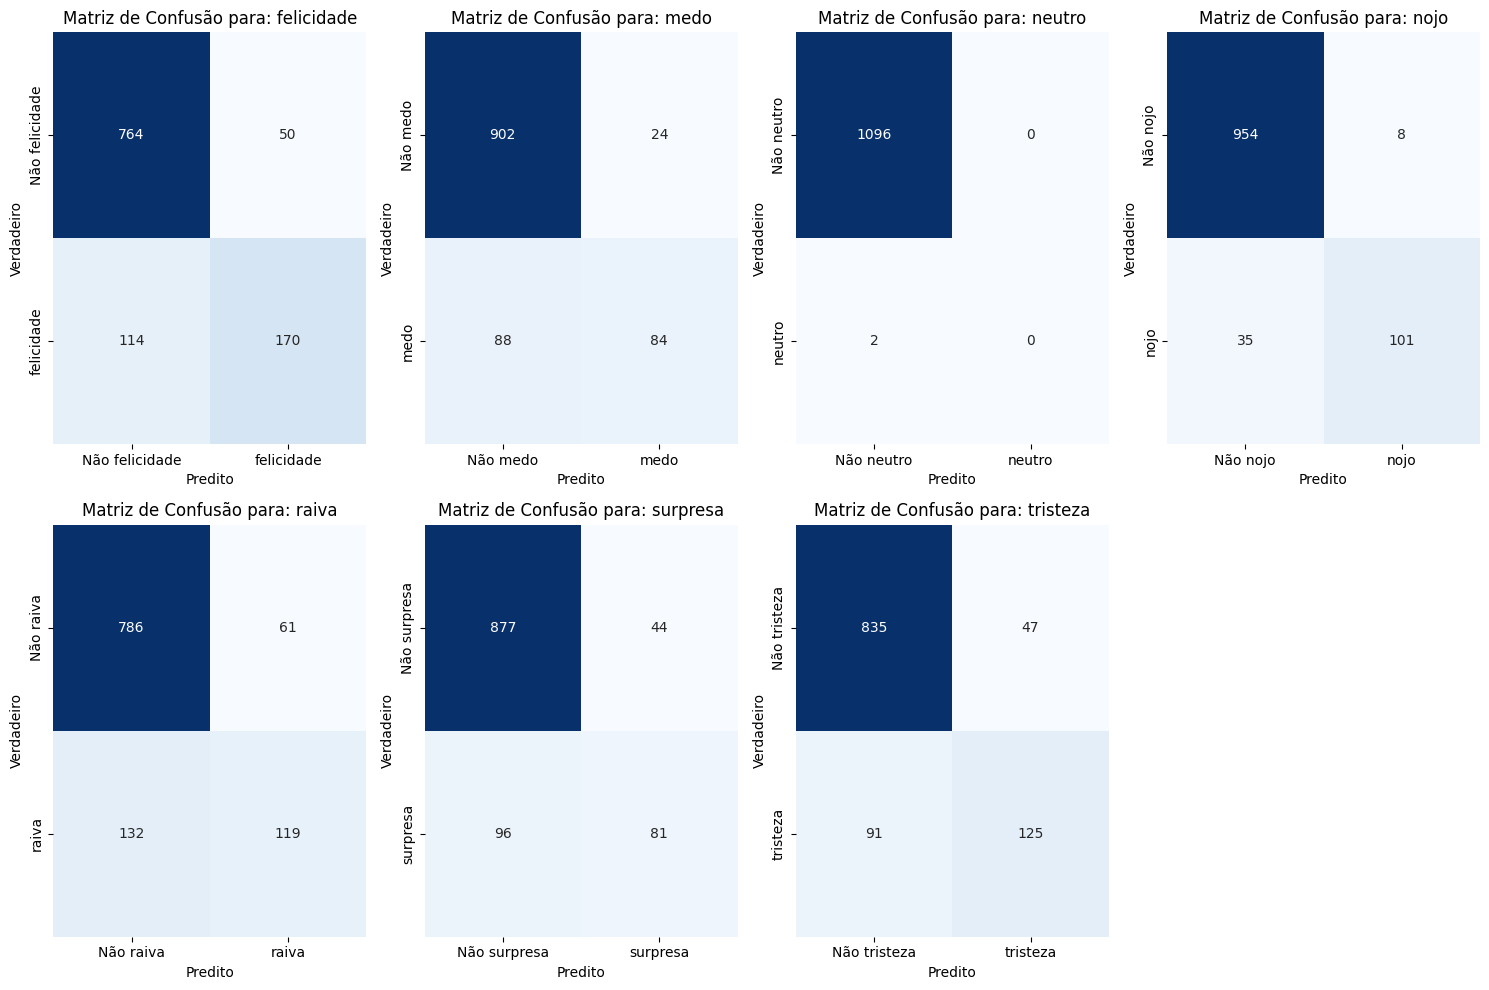


--- Relatório de Classificação Detalhado por Emoção ---
              precision    recall  f1-score   support

  felicidade       0.77      0.60      0.67       284
        medo       0.78      0.49      0.60       172
      neutro       0.00      0.00      0.00         2
        nojo       0.93      0.74      0.82       136
       raiva       0.66      0.47      0.55       251
    surpresa       0.65      0.46      0.54       177
    tristeza       0.73      0.58      0.64       216

   micro avg       0.74      0.55      0.63      1238
   macro avg       0.64      0.48      0.55      1238
weighted avg       0.74      0.55      0.63      1238
 samples avg       0.58      0.57      0.57      1238



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


predictions = model.predict(X_test_vec)


threshold = 0.5
predicted_labels_binary = (predictions > threshold).astype(int)

print("--- Matrizes de Confusão para Cada Emoção ---")

emotion_names = mlb.classes_

plt.figure(figsize=(15, 10))

for i, emotion_name in enumerate(emotion_names):
    cm = confusion_matrix(y_test[:, i], predicted_labels_binary[:, i])

    plt.subplot(2, (len(emotion_names) + 1) // 2, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Não ' + emotion_name, emotion_name],
                yticklabels=['Não ' + emotion_name, emotion_name])
    plt.title(f'Matriz de Confusão para: {emotion_name}')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')

plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report
print("\n--- Relatório de Classificação Detalhado por Emoção ---")
print(classification_report(y_test, predicted_labels_binary, target_names=emotion_names))

In [ ]:
from sklearn.metrics import jaccard_score, f1_score, recall_score

jaccard_acc = jaccard_score(y_test, predicted_labels_binary, average='samples')

print(f"Acurácia de Jaccard: {jaccard_acc:.4f}")



f1_weighted = f1_score(y_test, predicted_labels_binary, average='weighted')
f1_macro = f1_score(y_test, predicted_labels_binary, average='macro')

print(f"F1-score (Weighted): {f1_weighted:.4f}")
print(f"F1-score (Macro): {f1_macro:.4f}")


recall_weighted = recall_score(y_test, predicted_labels_binary, average='weighted')
recall_macro = recall_score(y_test, predicted_labels_binary, average='macro')

print(f"Recall (Weighted): {recall_weighted:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")

from sklearn.metrics import hamming_loss
h_loss = hamming_loss(y_test, predicted_labels_binary)
print(f"Hamming Loss: {h_loss:.4f}")


Acurácia de Jaccard: 0.5510
F1-score (Weighted): 0.6310
F1-score (Macro): 0.5499
Recall (Weighted): 0.5517
Recall (Macro): 0.4802
Hamming Loss: 0.1032


## SVM


--- Treinamento do Modelo SVM (One-vs-Rest) ---

--- Avaliação do Modelo SVM ---
SVM Acurácia de Jaccard: 0.3974
SVM F1-score (Weighted): 0.4841
SVM F1-score (Macro): 0.3665
SVM Recall (Weighted): 0.4032
SVM Recall (Macro): 0.2807
SVM Hamming Loss: 0.1354

--- Relatório de Classificação Detalhado por Emoção (SVM) ---
              precision    recall  f1-score   support

  felicidade       0.67      0.45      0.54       223
        medo       1.00      0.23      0.38        43
      neutro       0.00      0.00      0.00         0
        nojo       0.75      0.19      0.30        16
       raiva       0.56      0.50      0.53       212
    surpresa       0.71      0.28      0.40        85
    tristeza       0.62      0.31      0.41       113

   micro avg       0.63      0.40      0.49       692
   macro avg       0.62      0.28      0.37       692
weighted avg       0.66      0.40      0.48       692
 samples avg       0.43      0.42      0.42       692


--- Matrizes de Confusão par

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/skl

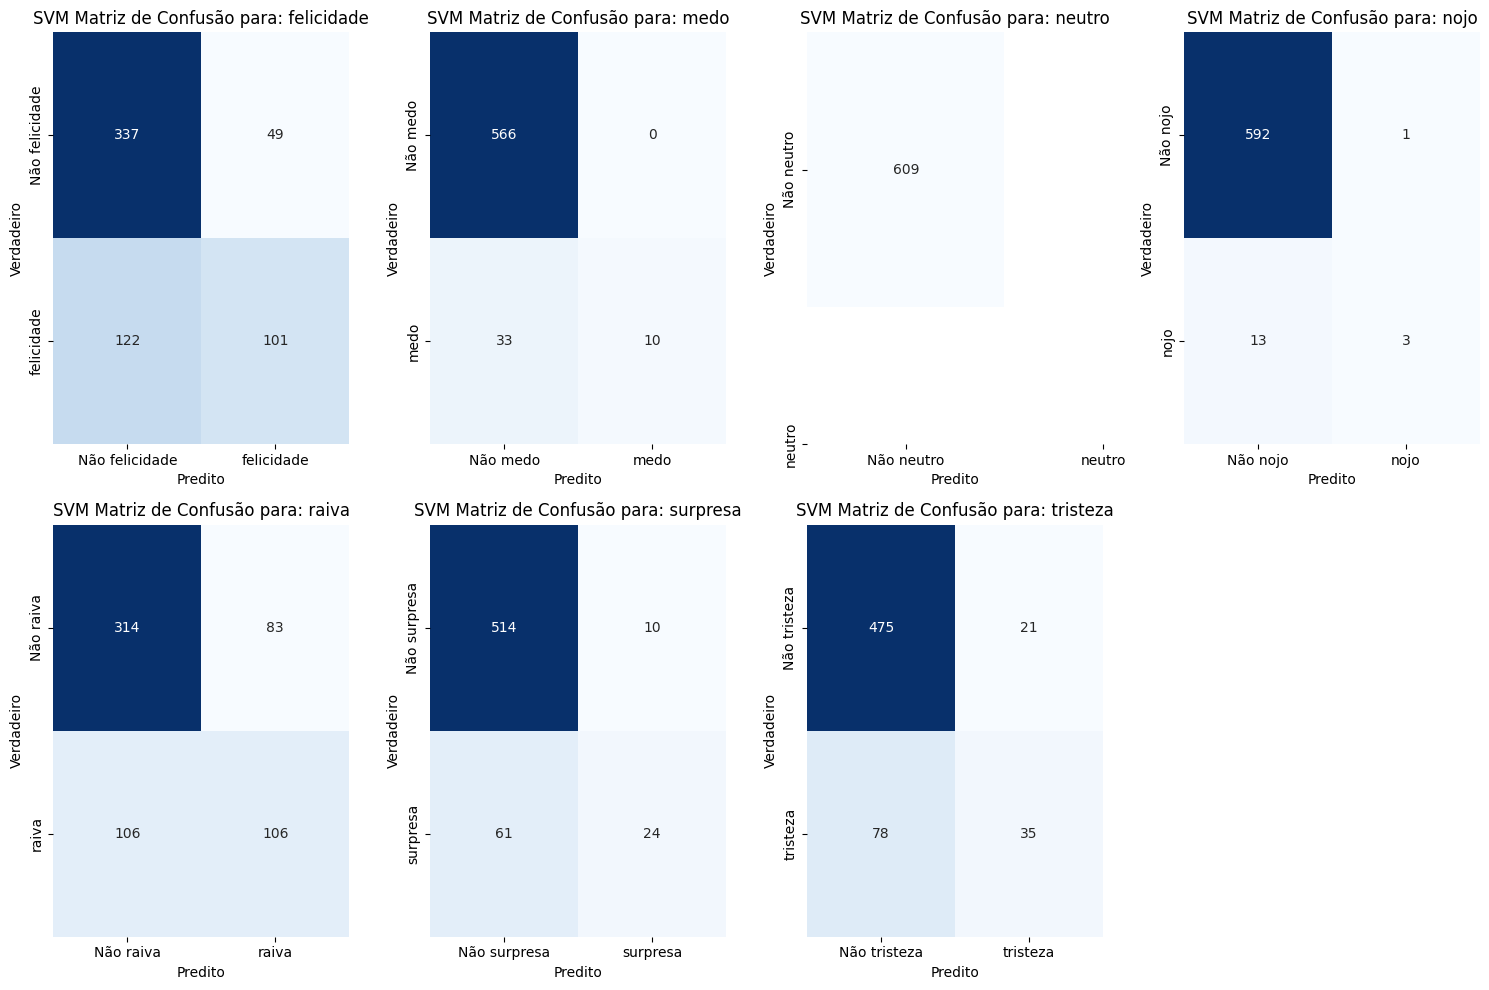

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
emotion_names = mlb.classes_


print("\n--- Treinamento do Modelo SVM (One-vs-Rest) ---")

svm_model = OneVsRestClassifier(LinearSVC(random_state=42))

svm_model.fit(X_train_vec, y_train)

print("\n--- Avaliação do Modelo SVM ---")

svm_predictions_binary = svm_model.predict(X_test_vec)


# Calcular Acurácia de Jaccard para o SVM
svm_jaccard_acc = jaccard_score(y_test, svm_predictions_binary, average='samples')
print(f"SVM Acurácia de Jaccard: {svm_jaccard_acc:.4f}")

# Calcular F1-score (Weighted e Macro) para o SVM
svm_f1_weighted = f1_score(y_test, svm_predictions_binary, average='weighted')
svm_f1_macro = f1_score(y_test, svm_predictions_binary, average='macro')
print(f"SVM F1-score (Weighted): {svm_f1_weighted:.4f}")
print(f"SVM F1-score (Macro): {svm_f1_macro:.4f}")

# Calcular Recall (Weighted e Macro) para o SVM
svm_recall_weighted = recall_score(y_test, svm_predictions_binary, average='weighted')
svm_recall_macro = recall_score(y_test, svm_predictions_binary, average='macro')
print(f"SVM Recall (Weighted): {svm_recall_weighted:.4f}")
print(f"SVM Recall (Macro): {svm_recall_macro:.4f}")

# Calcular Hamming Loss para o SVM
svm_h_loss = hamming_loss(y_test, svm_predictions_binary)
print(f"SVM Hamming Loss: {svm_h_loss:.4f}")


print("\n--- Relatório de Classificação Detalhado por Emoção (SVM) ---")
print(classification_report(y_test, svm_predictions_binary, target_names=emotion_names))


print("\n--- Matrizes de Confusão para Cada Emoção (SVM) ---")

plt.figure(figsize=(15, 10))

for i, emotion_name in enumerate(emotion_names):
    cm = confusion_matrix(y_test[:, i], svm_predictions_binary[:, i])

    plt.subplot(2, (len(emotion_names) + 1) // 2, i + 1) # Cria subplots dinamicamente
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Não ' + emotion_name, emotion_name],
                yticklabels=['Não ' + emotion_name, emotion_name])
    plt.title(f'SVM Matriz de Confusão para: {emotion_name}')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')

plt.tight_layout()
plt.show()
